### Ex. 1.1.


In [136]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np


def generate_dataset(
    mean_x: float,
    std_x: float,
    mean_y: float,
    std_y: float,
    n_points: int = 1000,
    a: float = 1.5,
    b: float = -2.5,
    c: float = 3.0,
    n_dims: int = 1,
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    if n_dims == 1:
        coef = np.array([a, b])
    elif n_dims == 2:
        coef = np.array([a, b, c])
    else:
        raise RuntimeError(f"n_dims={n_dims} not supported.")
    X = np.random.normal(loc=mean_x, scale=std_x, size=(n_points, n_dims))
    eps = np.random.normal(loc=mean_y, scale=std_y, size=n_points)
    y = np.hstack([X, np.ones(shape=(n_points, 1))]) @ coef + eps

    return X, y, coef


def compute_leverage_scores(X: np.ndarray) -> np.ndarray:
    U, S, Vh = np.linalg.svd(X, full_matrices=True)
    N = X.shape[0]
    d = X.shape[1]
    leverage_scores = np.zeros(N)
    for i in range(N):
        leverage_scores[i] = np.dot(U[i, :d], U[i, :d])
    return leverage_scores


def plot_datasets(
    datasets: list[tuple[np.ndarray, np.ndarray, np.ndarray]],
    leverage_scores: list[np.ndarray],
    colors: list[str],
    titles: list[str],
    contamination: float = 0.1,
) -> None:
    fig, axs = plt.subplots(nrows=2, ncols=2)
    fig.set_figwidth(10.0)
    fig.set_figheight(8.0)
    for ax, (X, y, coef), leverage_scores_, color, title in zip(
        axs.flatten(), datasets, leverage_scores, colors, titles
    ):
        ax: Axes
        # Plot normal points
        ax.scatter(X, y, c=color, marker=".")
        # Plot outliers
        threshold = np.quantile(leverage_scores_, 1 - contamination)
        Xo = X[leverage_scores_ >= threshold]
        yo = y[leverage_scores_ >= threshold]
        ax.scatter(Xo, yo, color="black")
        xs = np.expand_dims(np.array(ax.get_xlim()), axis=1)
        ax.plot(xs, np.hstack([xs, np.ones(shape=xs.shape)]) @ coef, color="black")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

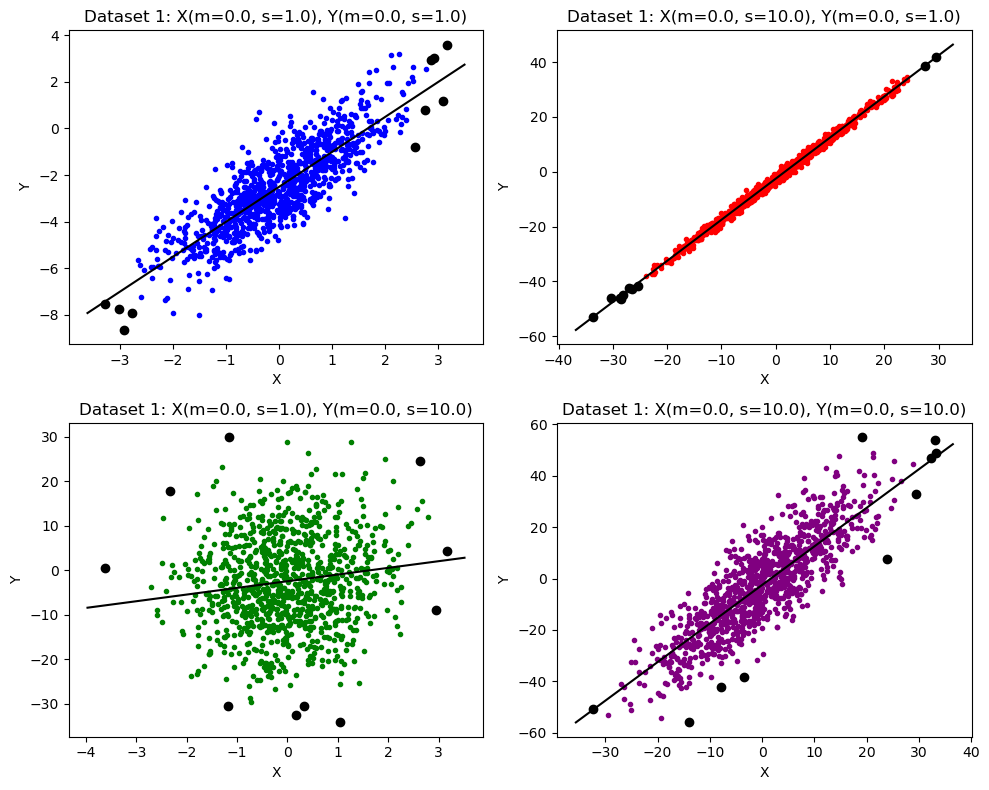

In [137]:
means_x = [0.0, 0.0, 0.0, 0.0]
stds_x = [1.0, 10.0, 1.0, 10.0]
means_y = [0.0, 0.0, 0.0, 0.0]
stds_y = [1.0, 1.0, 10.0, 10.0]
datasets_1d = [
    generate_dataset(mean_x, std_x, mean_y, std_y, n_points=1000)
    for mean_x, std_x, mean_y, std_y in zip(means_x, stds_x, means_y, stds_y)
]
leverage_scores = [compute_leverage_scores(X=np.hstack((ds[0], np.expand_dims(ds[1], axis=1)))) for ds in datasets_1d]

titles = [
    f"Dataset 1: X(m={mean_x}, s={std_x}), Y(m={mean_y}, s={std_y})"
    for mean_x, std_x, mean_y, std_y in zip(means_x, stds_x, means_y, stds_y)
]
plot_datasets(
    datasets_1d, leverage_scores, colors=["blue", "red", "green", "purple"], titles=titles, contamination=0.01
)